<a href="https://colab.research.google.com/github/koleshjr/Download-Images-using-fastai/blob/main/DownloadImagess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:


# Skip this cell if you already have duckduckgo_search installed
!pip install -Uqq duckduckgo_search
     


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.2 MB/s eta 0:00:00


In [15]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [18]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=500): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [8]:
urls = search_images('bird photos', max_images=1)
urls[0]

'http://2.bp.blogspot.com/-TA1D79yxcnM/Tyy6ng42rbI/AAAAAAAAAnc/-4s-bZaYc_U/s1600/colorfull+bird+HD+wallpaper.jpg'

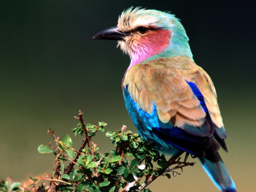

In [9]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)
     

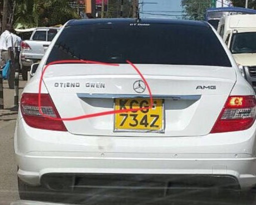

In [17]:


download_url(search_images('kenyan vehicles with number plate pictures', max_images=1)[0], 'car1.jpg', show_progress=False)
Image.open('car1.jpg').to_thumb(256,256)
     


In [19]:
searches = 'kenyan vehicles with number plate pictures',
path = Path('/content/kenyan_cars_license_plates')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    # sleep(10)  # Pause between searches to avoid over-loading server
    # download_images(dest, urls=search_images(f'{o} sun photo'))
    # sleep(10)
    # download_images(dest, urls=search_images(f'{o} shade photo'))
    # sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
